In [78]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import weather_api_key
import numpy as np
from scipy.interpolate import interp1d
from datetime import datetime
import matplotlib.dates as mdates
import pytz
import calendar

In [85]:
url = "http://api.openweathermap.org/data/2.5/air_pollution/history"
city = "Philadelphia"
cnt = "7" #number of forecast days
units = "imperial"
lon = "-75.1652"
lat = "39.9526"
start = "1641013200" 
end = "1672549140"

final_url = url + "?lat=" + lat + "&lon=" + lon + "&start=" + start + "&end=" + end + "&appid=" + weather_api_key
print(final_url)

http://api.openweathermap.org/data/2.5/air_pollution/history?lat=39.9526&lon=-75.1652&start=1641013200&end=1672549140&appid=155db15cf89682a55503d94f25dc4deb


In [86]:
aqi_num = requests.get(final_url).json()

In [87]:
aqi = []
time_stamp = []
ts = []

for day in range(8591):
    aqi.append(aqi_num['list'][day]['main']['aqi'])
    time_stamp.append(aqi_num['list'][day]['dt'])
    
for time in time_stamp:
    ts.append(datetime.fromtimestamp(time).strftime("%m-%d-%Y-%H"))

In [88]:
aqi_df = pd.DataFrame({
    "Time Stamp": time_stamp,
    "Human Time": ts,
    "AQI": aqi
})

total_count = aqi_df["AQI"].count()

aqi_groups = aqi_df.groupby(by="AQI").count()
aqi_groups = aqi_groups.reset_index()
aqi_groups["Time Percentage"] = round(aqi_groups["Time Stamp"]/total_count*100, 2)
aqi_groups

,AQI,Time Stamp,Human Time,Time Percentage
0,1,4110,4110,47.84
1,2,2993,2993,34.84
2,3,820,820,9.54
3,4,506,506,5.89
4,5,162,162,1.89


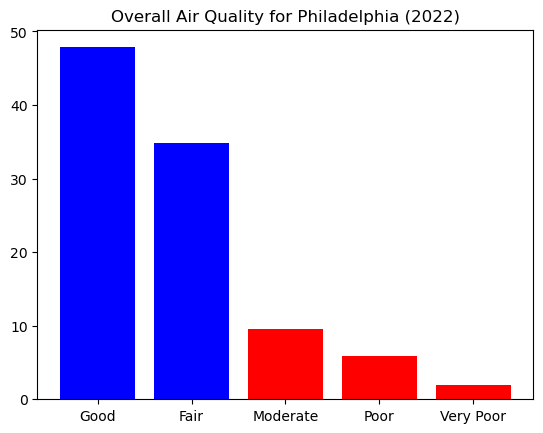

In [97]:
x = aqi_groups["AQI"]
y = aqi_groups["Time Percentage"]

labels = ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor']
colors = ['blue' if (s < 3) else 'red' for s in x]

plt.bar(x, y, color=colors, align="center")
x_axis = np.arange(len(aqi_groups["AQI"]))
tick_locations = [value for value in x]
plt.xticks(tick_locations, ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor'])
plt.title(f"Overall Air Quality for {city} (2022)")
plt.savefig("PHL_AQI_2022.png")
plt.show()
